<a href="https://colab.research.google.com/github/Amandine0610/linear_regression_model/blob/main/multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

In [2]:
data = pd.read_csv('Ecommerce_Sales_Prediction_Dataset.csv')

In [3]:
data = data[(data['Product_Category'] == 'Sports') & (data['Customer_Segment'] == 'Premium')]

In [4]:
X = data[['Price', 'Discount', 'Marketing_Spend']]
y = data['Units_Sold']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)
train_losses = []
test_losses = []
for i in range(100):
    sgd.partial_fit(X_train_scaled, y_train)
    train_pred = sgd.predict(X_train_scaled)
    test_pred = sgd.predict(X_test_scaled)
    train_losses.append(mean_squared_error(y_train, train_pred))
    test_losses.append(mean_squared_error(y_test, test_pred))

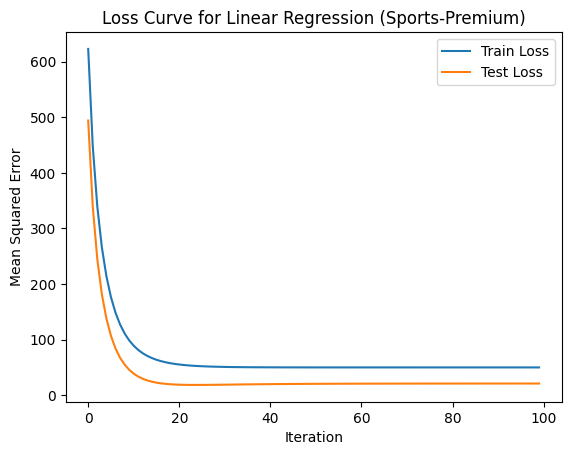

In [8]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve for Linear Regression (Sports-Premium)')
plt.legend()
plt.show()

In [9]:
# Evaluation of models
y_pred_sgd_train = sgd.predict(X_train_scaled)
y_pred_sgd_test = sgd.predict(X_test_scaled)
sgd_train_mse = mean_squared_error(y_train, y_pred_sgd_train)
sgd_test_mse = mean_squared_error(y_test, y_pred_sgd_test)
print(f"Linear Regression (SGD) - Train MSE: {sgd_train_mse:.4f}, Test MSE: {sgd_test_mse:.4f}")

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt_train = dt.predict(X_train_scaled)
y_pred_dt_test = dt.predict(X_test_scaled)
dt_train_mse = mean_squared_error(y_train, y_pred_dt_train)
dt_test_mse = mean_squared_error(y_test, y_pred_dt_test)
print(f"Decision Tree - Train MSE: {dt_train_mse:.4f}, Test MSE: {dt_test_mse:.4f}")

rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred_rf_train = rf.predict(X_train_scaled)
y_pred_rf_test = rf.predict(X_test_scaled)
rf_train_mse = mean_squared_error(y_train, y_pred_rf_train)
rf_test_mse = mean_squared_error(y_test, y_pred_rf_test)
print(f"Random Forest - Train MSE: {rf_train_mse:.4f}, Test MSE: {rf_test_mse:.4f}")

Linear Regression (SGD) - Train MSE: 50.0711, Test MSE: 21.1364
Decision Tree - Train MSE: 0.0000, Test MSE: 115.8571
Random Forest - Train MSE: 8.3870, Test MSE: 34.6025


In [10]:
# Save best model
models = {'Linear Regression': (sgd, sgd_test_mse), 'Decision Tree': (dt, dt_test_mse), 'Random Forest': (rf, rf_test_mse)}
best_model_name = min(models, key=lambda k: models[k][1])
best_model = models[best_model_name][0]

with open('best_sports_premium_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print(f"Best model ({best_model_name}) saved with Test MSE: {models[best_model_name][1]:.4f}")

Best model (Linear Regression) saved with Test MSE: 21.1364


In [11]:
# Prediction function
def predict_sports_premium_sales(price, discount, marketing_spend):
    with open('best_sports_premium_model.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)

    input_data = pd.DataFrame({
        'Price': [price],
        'Discount': [discount],
        'Marketing_Spend': [marketing_spend]
    })
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    return prediction[0]

# Example prediction
new_sale = predict_sports_premium_sales(500, 20, 5000)
print(f"Predicted units sold for sports (premium): {new_sale:.2f}")

Predicted units sold for sports (premium): 31.09
